# Analytic approximation of normal implied volatility (Choi et al 2007)

## Replication

In [1]:
import numpy as np
import scipy.stats as ss
import math
import matplotlib.pyplot as plt

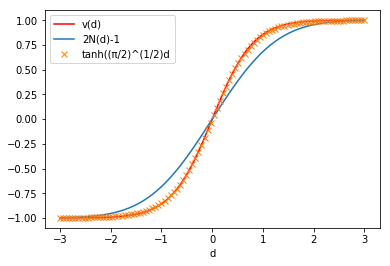

In [2]:
#Figure 1
d=np.linspace(-3,3,num=100)
v=d/(d*(2*ss.norm.cdf(d)-1)+2*ss.norm.pdf(d))
N=2*ss.norm.cdf(d)-1
tan=np.tanh(np.sqrt(math.pi/2)*d)
plt.plot(d,v, 'r')
plt.plot(d,N, '-')
plt.plot(d,tan, 'x')
plt.xlabel('d')
plt.legend(['v(d)','2N(d)-1','tanh((π/2)^(1/2)d'])# make legend
plt.show()

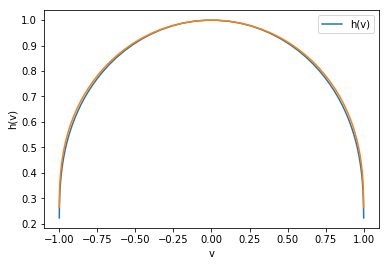

In [4]:
#Figure 2
hv=np.sqrt(2/math.pi)*v/d
plt.plot(v,hv)
plt.ylabel('h(v)')
plt.xlabel('v')
plt.legend(['h(v)'])
plt.show()

C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in arctanh
  
C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arctanh
  


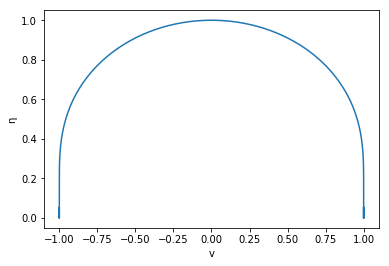

In [14]:
#Show the relationship between v and η
itaa=v/np.arctanh(v)
plt.plot(v,itaa)
plt.xlabel('v')
plt.ylabel('η')
plt.show()

C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in arctanh
  
C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arctanh
  
C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\trz22\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


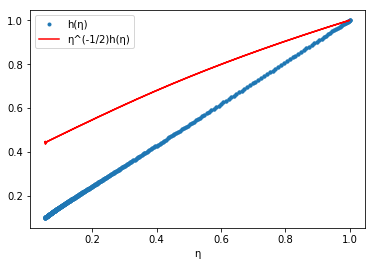

In [9]:
#Figure 3
#use sqrt(η/2π) appromix h(η)
N=10000
d=np.linspace(-N,N,num=100*N)
v=d/(d*(2*ss.norm.cdf(d)-1)+2*ss.norm.pdf(d))
itaa=v/np.arctanh(v)
hitaa3=itaa*np.sqrt(2/math.pi)*np.log((1+v)/(1-v))/(2*d)
plt.plot(itaa,hitaa3,'.')
ithitaa3=hitaa3/np.sqrt(itaa)
plt.plot(itaa,ithitaa3, 'r')
plt.xlabel('η')
plt.legend(['h(η)','η^(-1/2)h(η)'])# make legend
plt.show()

In [10]:
#define a model that we can use straddle price to predict the implied volatility
class Model:
    straddle,strike, spot, texp,intr,divr= None, None, None, None, None, None
    def __init__(self,straddle,strike, spot, texp, intr=0, divr=0):
        self.texp = texp
        self.straddle = straddle
        self.intr = intr
        self.divr = divr
        self.spot = spot
        self.strike = strike
     #define h(η)  
    def h_a(self,ita=0.5):
        a=[  3.994961687345134*10**1	,
                    2.100960795068497*10**1	,
                    4.980340217855084*10**1	,
                    5.988761102690991*10**2	,
                    1.848489695437094*10**3	,
                    6.106322407867059*10**3	,
                    2.493415285349361*10**4	,
                    1.266458051348246*10**4	]
        b=[1.000000000000000*10**0		,
                    4.990534153589422*10**1		,
                    3.093573936743112*10**1		,
                    1.495105008310999*10**3		,
                    1.323614537899738*10**3		,
                    1.598919697679745*10**4		,
                    2.392008891720782*10**4		,
                    3.608817108375034*10**3		,
                    2.067719486400926*10**2		,
                    1.174240599306013*10**1		]
        up=0
        for i in range(0,8):
            up=up+a[i]*ita**i;
        down=0
        for i in range(0,10):
            down=down+b[i]*ita**i;
        return np.sqrt(ita)*up/down
    #define ita  
    def ita(self,v):
             ita_1=v/np.arctanh(v)  
             return ita_1
         
    def impvol(self):
            straddle=self.straddle
            strike=self.strike
            spot=self.spot
            texp=self.texp
            v=(spot-strike)/straddle
            ita_2=self.ita(v)
            h_a1=self.h_a(ita_2)
            vol = np.sqrt(np.pi/(2*texp))*straddle*h_a1
            return vol

In [12]:
#test        
sb = Model(30,5, 20, 50, intr=0, divr=0)
print(sb.impvol())

4.83478675936
